In [93]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
# loading the data
data = pd.read_excel("data\AB_NYC_2019.xlsx")

### Data inspection and clean-up

In [95]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [97]:
# data types are correct but we have a few missing values
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [98]:
# I create a new df and drop the two columns having most NaNs, as they are not needed for this analysis
clean_data = data.drop(['last_review', 'reviews_per_month'], axis=1)
clean_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [99]:
# and fill the few remaining NaNs with "Unknown"
clean_data['name'] = clean_data['name'].fillna('Unknown')
clean_data['host_name'] = clean_data['host_name'].fillna('Unknown')
clean_data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [100]:
# I also make sure we have no duplicate rows
clean_data.duplicated().sum()

0

### Outlier detection and handling

In [101]:
clean_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


c:\Users\ornel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


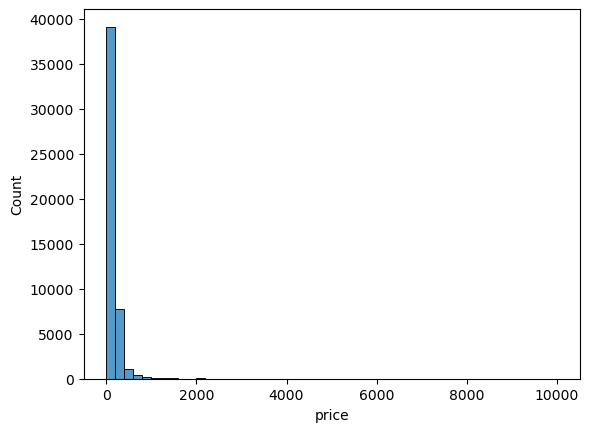

In [102]:
# I am interested in "price" and "minimum_nights" as they seem to have a wide range 
sns.histplot(x="price", data=clean_data, bins=50)
plt.show()

In [103]:
len(clean_data[clean_data["price"] > 1000])

239

In [104]:
# I will consider listings with price per night over 1000 as outliers, so I will remove them
clean_data = clean_data[clean_data.price <= 1000]

c:\Users\ornel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


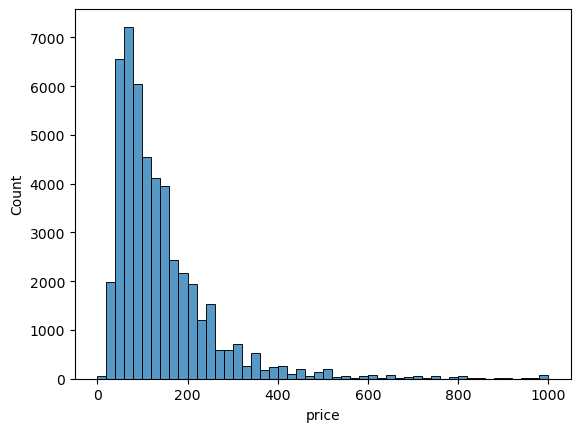

In [105]:
sns.histplot(x="price", data=clean_data, bins=50)
plt.show()

c:\Users\ornel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


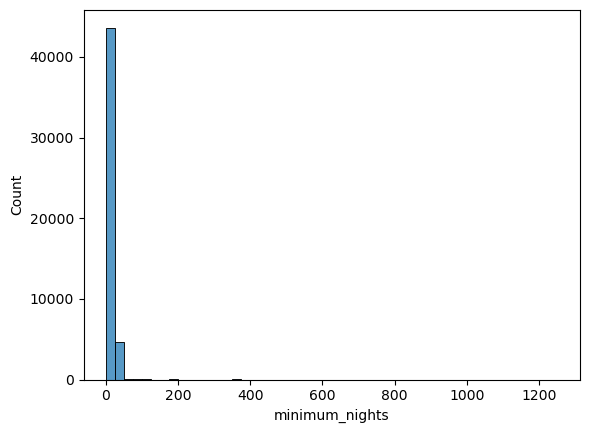

In [106]:
# now let's look at column "minimum_nights"
sns.histplot(x="minimum_nights", data=clean_data, bins=50)
plt.show()

In [107]:
# I will consider more than 30 days as outliers
len(clean_data[clean_data["minimum_nights"] > 30])

721

c:\Users\ornel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


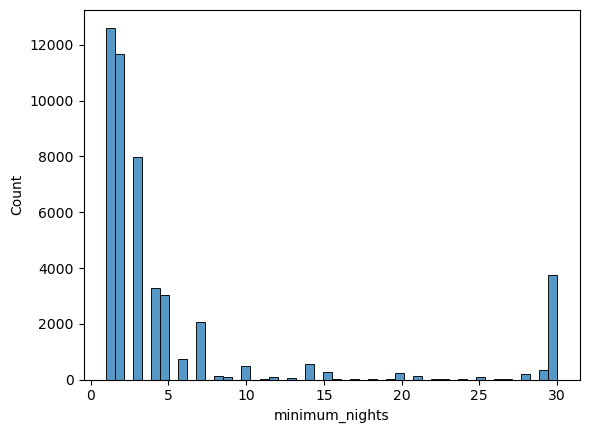

In [108]:
clean_data = clean_data[clean_data["minimum_nights"] <= 30]
sns.histplot(x="minimum_nights", data=clean_data, bins=50)
plt.show()

In [109]:
# we can see how means and max values have been influenced. We now have less noise and robust data.
clean_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.793500e+04,4.793500e+04,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000,47935.000000
mean,1.903404e+07,6.778949e+07,40.728826,-73.951875,141.282403,5.576426,23.542985,7.164410,111.436320
std,1.096797e+07,7.865304e+07,0.054590,0.046299,116.871854,8.196302,44.791153,33.122006,131.060301
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.485858e+06,7.910880e+06,40.689940,-73.982850,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969924e+07,3.103925e+07,40.722860,-73.955510,105.000000,2.000000,5.000000,1.000000,43.000000
75%,2.914088e+07,1.074344e+08,40.763050,-73.935845,175.000000,5.000000,24.000000,2.000000,223.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,1000.000000,30.000000,629.000000,327.000000,365.000000


### Exploration and insights

In [110]:
# Expensive to cheapest neighbourhood groups 
clean_data.groupby(["neighbourhood_group"], as_index=False)["price"].mean().sort_values(by="price", ascending=False)

,neighbourhood_group,price
2,Manhattan,179.161607
1,Brooklyn,117.818127
4,Staten Island,98.950954
3,Queens,95.203248
0,Bronx,85.482823


In [111]:
# Top 5 cheapest neighbourhoods with their respective neighbourhood groups
clean_data.groupby(["neighbourhood_group", "neighbourhood"], as_index=False)["price"].mean().sort_values(by="price", ascending=True).head()

,neighbourhood_group,neighbourhood,price
181,Staten Island,Bull's Head,47.333333
17,Bronx,Hunts Point,50.500000
39,Bronx,Tremont,51.545455
36,Bronx,Soundview,53.466667
199,Staten Island,New Dorp,57.000000


In [112]:
# Neighbourhoods by number of AirBnB hosts listed 
clean_data.groupby(["neighbourhood_group"], as_index=False).size().sort_values(by="size", ascending=False)

,neighbourhood_group,size
2,Manhattan,21082
1,Brooklyn,19805
3,Queens,5604
0,Bronx,1077
4,Staten Island,367


In [113]:
# Room types and prices in the Bronx
filtered_df = clean_data[clean_data["neighbourhood_group"] == "Bronx"]
filtered_df.groupby(["room_type"], as_index=False)["price"].agg(['mean', 'count']).sort_values(by="count", ascending=False)

,room_type,mean,count
1,Private room,63.083205,649
0,Entire home/apt,128.891599,369
2,Shared room,60.389831,59


In [114]:
# Room types by number of listings and average price 
clean_data.groupby(["room_type"], as_index=False)["price"].agg(['mean', 'count'])

,room_type,mean,count
0,Entire home/apt,195.081648,24728
1,Private room,84.791534,22066
2,Shared room,67.820333,1141


In [115]:
# Top 5 most reviewed listings in NYC in 2019
clean_data.groupby(['id'], as_index=False)["number_of_reviews"].sum().sort_values(by="number_of_reviews", ascending=False).head(5)

,id,number_of_reviews
11492,9145202,629
1962,903972,607
1961,903947,597
1948,891117,594
13204,10101135,576


In [116]:
# Deep dive into the most reviewed listing of 2019
clean_data.iloc[11492]

id                                                9145202
name                              Room near JFK Queen Bed
host_id                                          47621202
host_name                                            Dona
neighbourhood_group                                Queens
neighbourhood                                     Jamaica
latitude                                          40.6673
longitude                                       -73.76831
room_type                                    Private room
price                                                  47
minimum_nights                                          1
number_of_reviews                                     629
calculated_host_listings_count                          2
availability_365                                      333
Name: 11759, dtype: object

### Data visualization

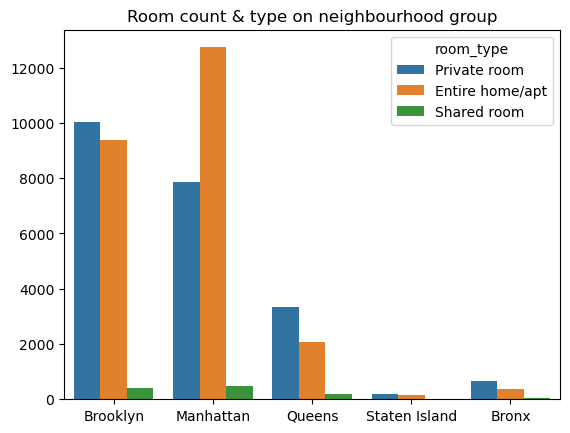

In [117]:
# Listings by room types & neighbourhood groups
sns.countplot(x="neighbourhood_group", hue="room_type", data=clean_data)
plt.xlabel("")
plt.ylabel("")
plt.title('Room count & type on neighbourhood group')
plt.show()

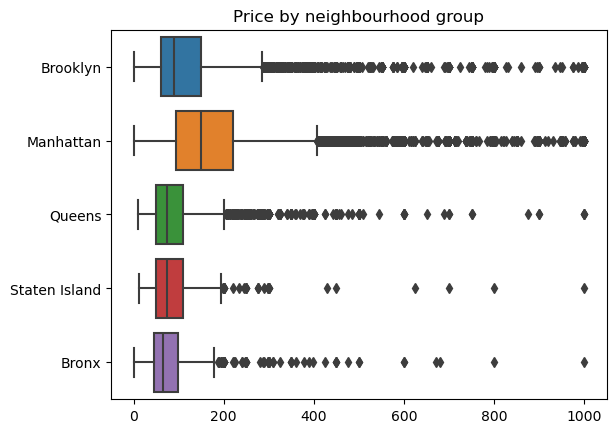

In [118]:
# Plotting price distributions by neighbourhood groups
sns.boxplot(x='price', y='neighbourhood_group', data=clean_data)
plt.xlabel("")
plt.ylabel("")
plt.title('Price by neighbourhood group')
plt.show()

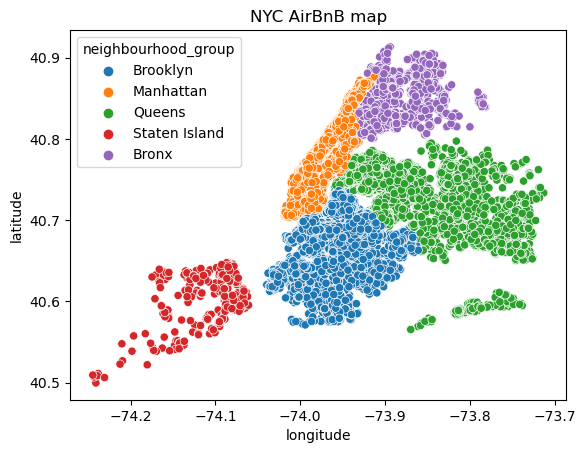

In [119]:
# BONUS VIZ! Map of NYC based on the listings
sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group", data=clean_data)
plt.title("NYC AirBnB map")
plt.show()